In [ ]:
# 데이터의 표현
- vector / matrix
- vector 표현하고자 하는 것 : 크기와 방향 
- 크기 : kmeans, knn
- 방향 (내적) : PCA,MDS,FFNN(신경망)
- kmeans clustering(군집분석)
    -k개수, 중심값이 먼저 결정
    -지속적으로 중심값을 재계산하고 군집이 완료되면 그 군집수 만큼 중심이 존재
    -중심값을 해석하면 그 군집의 의미를 확인할수 있ㅇ므 (domain knowledge)
    -대분류 , 원형 이상치 제거 , 벡터양자화(압축), 이상탐지(침입탐지), 추천 
-거리값 전처리 : 정규화 : 가중치를 제거하기 위해서 > 독립변수의 영향력을 균등하게 
-거리값 알고리즘 : 유클리디안 거리값, 맨허튼거리값
-agglomerative hierachical cluastering (계층적 군집)
-DBSCAN : 핵심, 경계, 잡음 :EPS(거리값), MIN_PTS(군집화의 최소값)
        -eps(거리값)값을 크게하면 군집수는 줄어들고 잡음은 줄어듬
        

In [93]:
import numpy as np
import scipy
import sklearn.metrics.pairwise
a_64 = np.array([61.22,71.60, -65,755], dtype=np.float64)
b_64 = np.array([61.22,71.608, -65,72], dtype=np.float64)
a_32 = a_64.astype(np.float32)
b_32 = b_64.astype(np.float32)
dist_64_np = np.array([np.linalg.norm(a_64-b_64)], dtype= np.float64)
dist_32_np = np.array([np.linalg.norm(a_32-b_32)], dtype= np.float32)
dist_64_sklearn = sklearn.metrics.pairwise.pairwise_distances([a_64],[b_64])
# 직각으로 가는 절대값 거리
dist_64_sklearn_manhattan = sklearn.metrics.pairwise.pairwise_distances([a_64],[b_64],metric="manhattan")

print(dist_64_sklearn)
print(dist_64_sklearn_manhattan)
from sklearn.metrics.pairwise import euclidean_distances #특화함수
print("euclidean_distances", euclidean_distances([a_64],[b_64]))

[[683.00000005]]
[[683.008]]
euclidean_distances [[683.00000005]]


In [ ]:
# 방향값 계산

In [94]:
import numpy as np 
a = np.array([0,1,0]) # 공간좌표계
b = np.array([1,0,0])
res = np.dot(a,b)
print(res) # 내적결과가 0 : 직교
# 단일 벡터 : 크기 : norm, 방향 : normalize
print(np.linalg.norm(a))
print(np.linalg.norm(b))
print(np.linalg.norm(a) * np.linalg.norm(b))
rad = res / (np.linalg.norm(a) * np.linalg.norm(b))
print("cos theta", rad)
print(np.arccos(rad)) # 각도
print(np.degrees(np.arccos(rad))) # radian(호의 길이로 표현된 각도) / degree(사람)

0
1.0
1.0
1.0
cos theta 0.0
1.5707963267948966
90.0


In [ ]:
#knn( kneighbor nealeast)
- k값을 이용해서 변화
- 큰 k 값 : Bias 가 감소
- 작은 k 값 : 과적합(variance가 감소)
- 정규화, 범주형변수인 경우에는 dummy coding 을 전처리 

In [95]:
import numpy as np 
from sklearn.neighbors import NearestNeighbors
samples = [[0,0,2],[1,0,0],[0,0,1]]

neigh = NearestNeighbors(2,0.4) # k =2 개를 살피고
neigh.fit(samples)
neigh.kneighbors([[0,0,1.3]],2,return_distance= False) # [2 0 ]

# 반지름 이내의 포인트 찾기
nbrs = neigh.radius_neighbors([[0,0,1.3]],0.4,return_distance=False)
np.asarray(nbrs[0][0])

array(2, dtype=int64)

5


array([[5.90980392, 2.73529412],
       [5.1875    , 3.6375    ],
       [6.85348837, 3.1       ],
       [4.76666667, 2.89166667]])

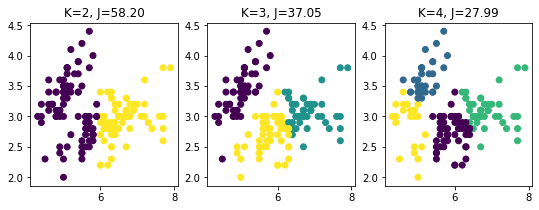

In [18]:
from sklearn import cluster,datasets
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
iris = datasets.load_iris() # 변수가 4개 종속변수 1
X = iris.data[:, :2] # 변수 2개 , 실제 데이터
y_iris = iris.target
km2 = cluster.KMeans(n_clusters=2).fit(X)
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=km2.labels_) 
plt.title("K=2, J=%.2f" % km2.inertia_) # 그룹내 거리의 제곱값의 합계 : 그룹핑이 잘되면 작은값이 최적  > 그룹내의 거리가 좁아야함
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=km3.labels_)
plt.title("K=3, J=%.2f" % km3.inertia_)
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=km4.labels_)
plt.title("K=4, J=%.2f" % km4.inertia_)

print(km4.n_iter_) # 디폴트가 반복해서 학습한 회수
km4.cluster_centers_ # 중심점을 해석해서 분석

In [96]:
km4.labels_

array([1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1,
       1, 3, 1, 3, 1, 1, 2, 2, 2, 0, 2, 0, 2, 3, 2, 3, 3, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 2, 0, 2, 0, 2, 2, 3, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

[[7 5]
 [5 7]
 [7 7]
 [4 4]
 [4 6]
 [1 4]
 [0 0]
 [2 2]
 [8 7]
 [6 8]
 [5 5]
 [3 7]]


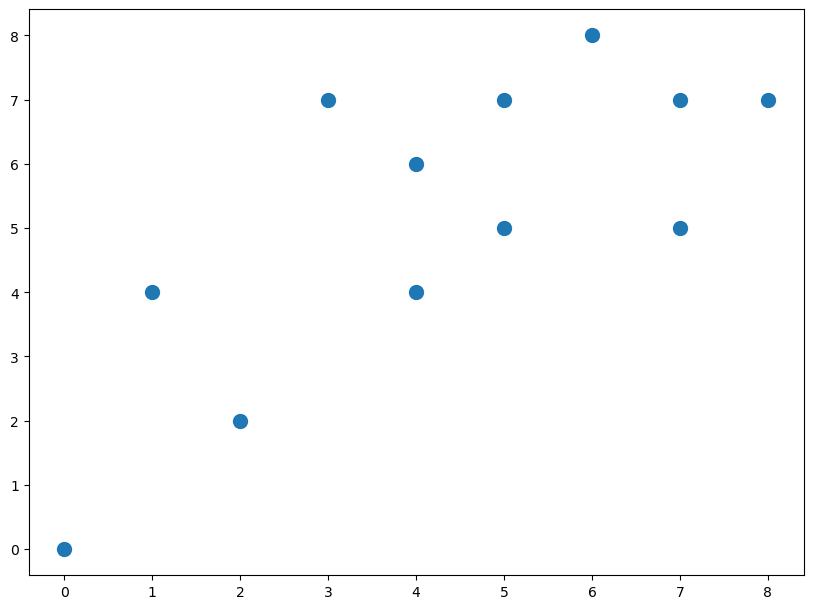

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
X = np.array([[7, 5],[5, 7],[7, 7],[4, 4],[4, 6],[1, 4],
              [0, 0],[2, 2],[8, 7],[6, 8],[5, 5],[3, 7]])
print(X)
plt.scatter(X[:,0], X[:,1], s=100)
plt.show() 

[[6.6        6.8       ]
 [2.71428571 4.        ]]
[6.6 6.8] [2.71428571 4.        ]
[0 0 0 1 1 1 1 1 0 0 0 1]
12
63.004081632653055


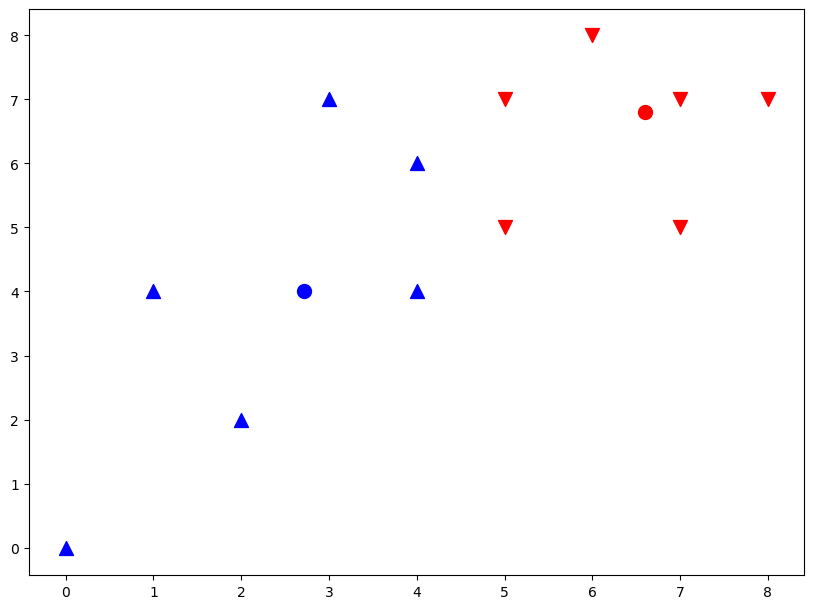

In [98]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init="random", n_init=1 , max_iter=1, random_state=1).fit(X)
print(model.cluster_centers_)
c0,c1 = model.cluster_centers_
print(c0,c1)
print(model.labels_)
print(len(model.labels_))
print(model.inertia_) # 그룹수가 많아 지면 자동으로 줄어듬 :평가의 척도가 되진 않음
plt.scatter(X[model.labels_ == 0,0],X[model.labels_ == 0,1], s= 100, marker ='v' , c='r')
plt.scatter(X[model.labels_ ==1,0],X[model.labels_ == 1,1], s= 100, marker ='^' , c='b')
plt.scatter(c0[0],c0[1],s=100,c="r") # 중심점
plt.scatter(c1[0],c1[1],s=100,c="b") # 중심점
plt.show()

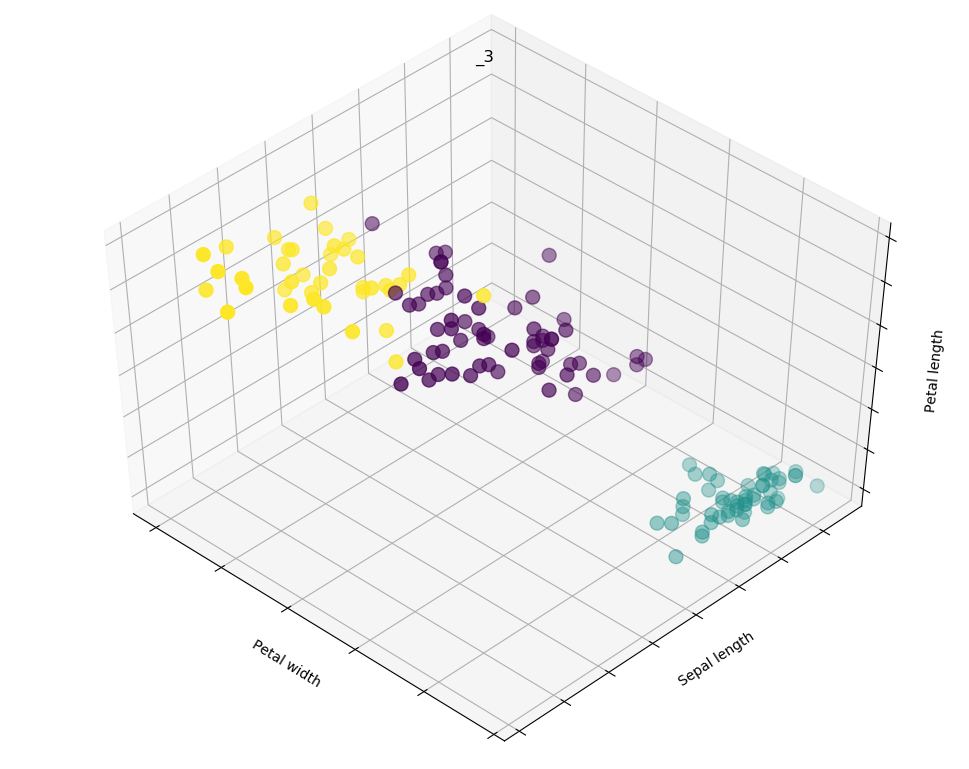

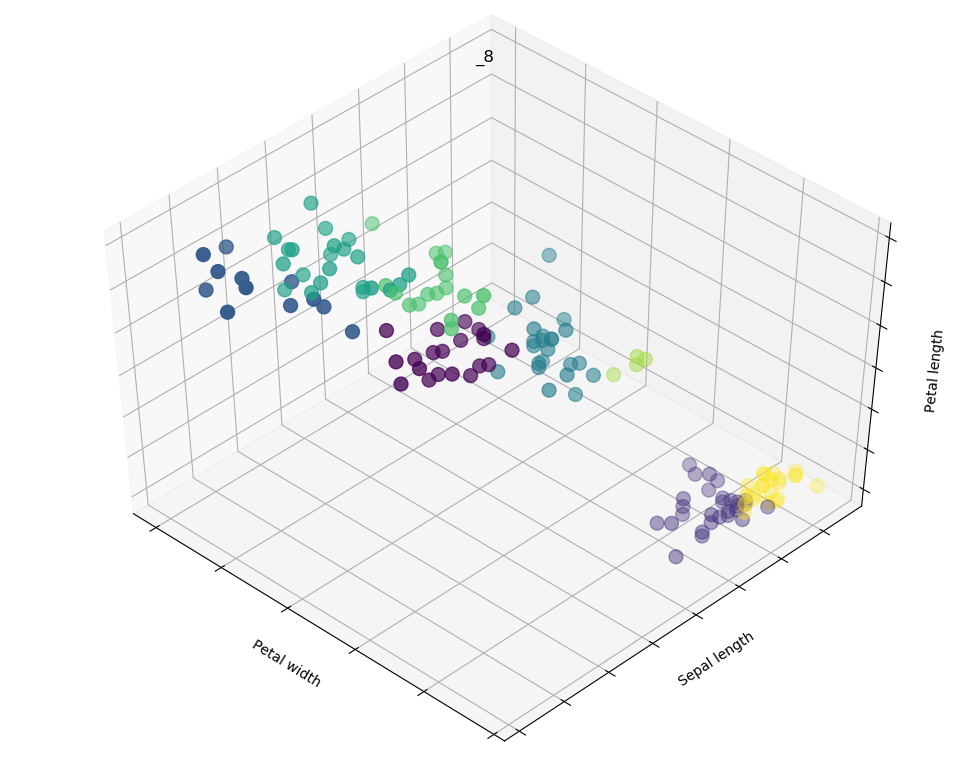

In [99]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
np.random.seed(5)
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target
estimators = {'_3': KMeans(n_clusters=3),
              '_8': KMeans(n_clusters=8)} # 모델 인스턴스 
fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum)
    plt.clf() 
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134) # 카메라의 초기치 결정
    plt.cla() # 도화지 초기화
    est.fit(X) 
    labels = est.labels_ # 전체 데이터에 대한 레이블
    # 4개의 변수 : 3차원으로 출력(1)
    # 4차원을 시각화 > PCA 차원축소
    # COLOR 값은 정수형 부동소수점(정규화)
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float), s=100)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    plt.title(name)
    fignum = fignum + 1
plt.show() 

In [100]:
# k값 결정을 위한 elbow기법 : 5 개나 4개읭 클러스터링이 적합하다.
from sklearn.datasets.samples_generator import make_blobs
x, y = make_blobs(n_samples=100, centers= 5 , random_state = 101)

[6590.911023009172, 3198.8372295522245, 1197.8007257715003, 540.6460706067455, 201.8137473656779, 180.63982987451405, 160.83266668219127, 142.48347603482338, 123.93948582971582, 110.36032138449815, 102.02286836271897, 94.91114849165838, 84.21794910310575, 76.41254094525229, 70.77348949663566, 65.71596576020282, 59.5929522842884, 54.0204409597916, 53.43853160492941]


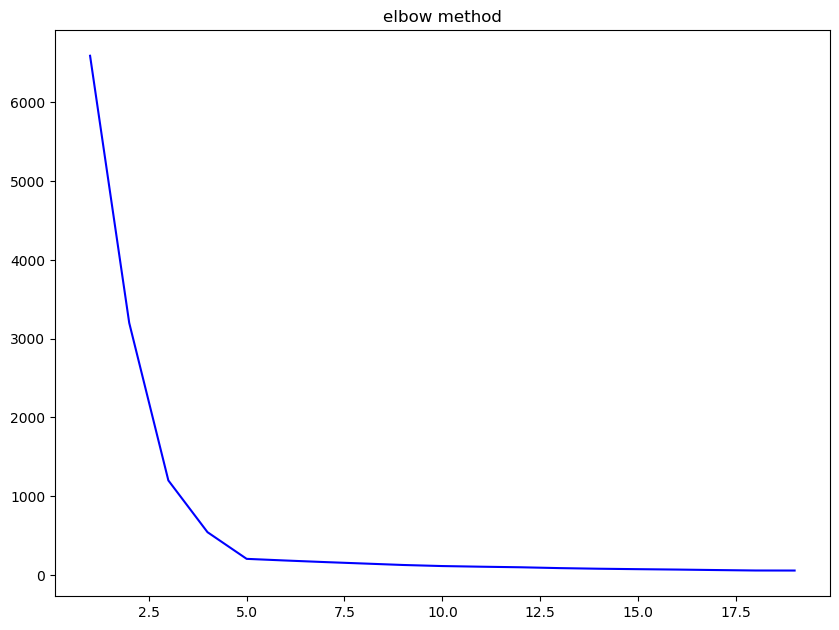

In [101]:
import seaborn as sns 
from sklearn.cluster import KMeans
elbow = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(x)
    elbow.append(kmeans.inertia_) # 각 요소가 자기가 속한 군집까지의 거리
print(elbow)
sns.lineplot(range(1,20), elbow,color='blue')
plt.rcParams.update({'figure.figsize':(10,7.5),'figure.dpi':100})
plt.title("elbow method")
plt.show()

In [103]:
# 군집모델의 평가 
- 조정랜드지수 : 가능한 모든 데이터 쌍의 개수에 대해 정답인 데이터 쌍의 개수의 비율 
                - 정답을 알고 있을때
실루엣(Slihouette)
#모든 샘플에 대해 계산
: a = 데이터가 속한 군집의 거리제곱값의 평균
  b = 자기가 속한 군집이외에 가장 가까운 군집과의 거리
  (b-a) / max(a,b) # a보다 b가 크면 군집이 잘됨 : 양수
                   # a가 b 보다 크면 군집이 잘 안잡힘 : 음수
        
 실루엣 지수는 큰게 좋음
    

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 11)

In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans
# 변수가 2개
X = np.loadtxt('data_quality.txt', delimiter=',')
plt.figure()
plt.scatter(X[:,0],X[:,1], color='black', s = 80, marker='o', facecolors='none')
x_min, x_max = X[:,0].min() - 1 , X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1 , X[:,1].max() + 1
plt.title('input data')
plt.xlim(x_min,x_max) # 영역을 제한 
plt.ylim(y_min,y_max)
plt.xticks(())
plt.yticks(())
        

In [104]:
scores = [] 
values = np.arange(2,10)
for num_clusters in values: # 클러스터수 == 군집수 : 샘플은 lables , 군집 중심값
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10) # kmeans++ > 초기 중심값을 빨리찾는다
    kmeans.fit(X)
    score = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean', sample_size = len(X))
    print("\n클러스터의 수 =", num_clusters)
    print("실루엣지수 =", score)
    scores.append(score)




클러스터의 수 = 2
실루엣지수 = 0.6810461692117461

클러스터의 수 = 3
실루엣지수 = 0.5528190123564091

클러스터의 수 = 4
실루엣지수 = 0.4980505049972867

클러스터의 수 = 5
실루엣지수 = 0.488748887093105

클러스터의 수 = 6
실루엣지수 = 0.36871053323330394

클러스터의 수 = 7
실루엣지수 = 0.3520074671616282

클러스터의 수 = 8
실루엣지수 = 0.35075973074887445

클러스터의 수 = 9
실루엣지수 = 0.32406364102795654


C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50659 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50752 missing from current

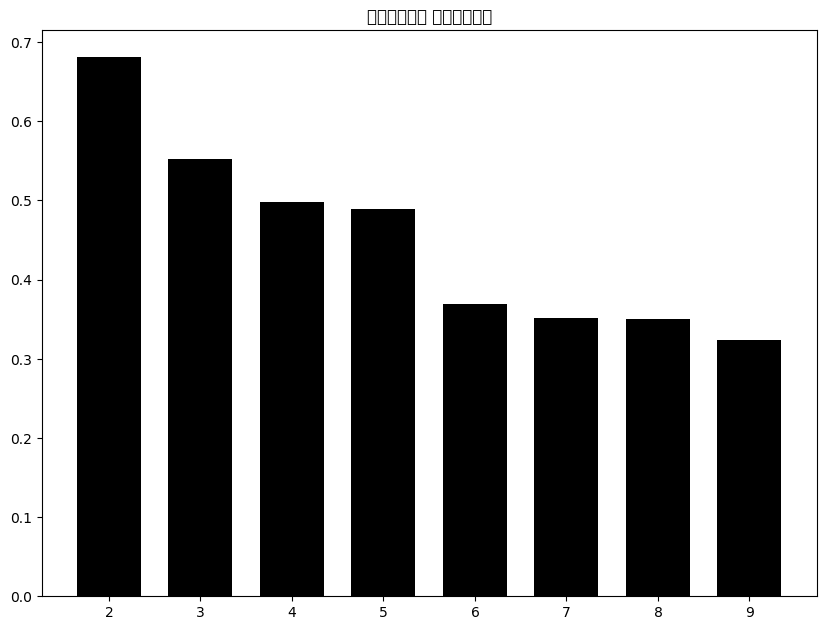


최적의 클러스터 수 = 2


In [105]:
plt.figure()
plt.bar(values, scores, width=0.7, color='black', align='center')
plt.title('실루엣지수와 클러스터개수')
plt.show()

num_clusters = np.argmax(scores) + values[0]
print('\n최적의 클러스터 수 =', num_clusters) 

In [106]:
import matplotlib as mpl
mpl.matplotlib_fname()

'C:\\Users\\2-13\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

(427, 640, 3)
427 640 3
Kmeans 데이터 피팅
(k-means) 예측
(273280,)


C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50896 missing from current

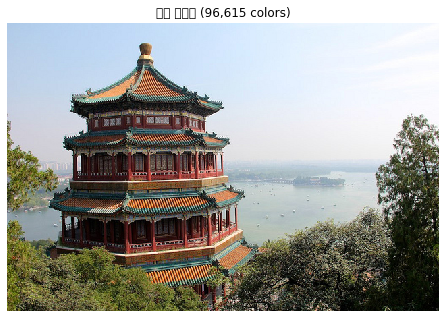

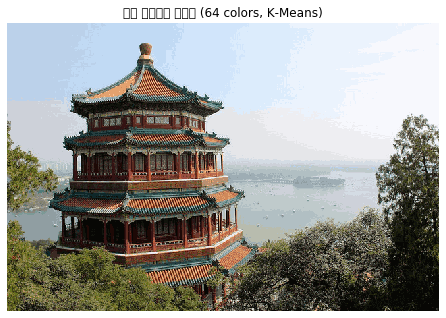

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle


n_colors = 64
china = load_sample_image("china.jpg")
china = np.array(china, dtype=np.float64) / 255 # 이미지 정규화 : 컬러값 0-255

print(china.shape)
w, h, d = original_shape = tuple(china.shape)
print(w, h, d)
assert d == 3  # rgv (red,green,blue)
image_array = np.reshape(china, (w * h, d))

 
print("Kmeans 데이터 피팅")
#시간이 낭비 > 1000개의 컬러값을 임의적으로 뽑아서
image_array_sample = shuffle(image_array, random_state=0)[:1000]
# cluster = 64
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
# 1000개의 컬러값 > 64컬러 변환
# 중심값이 64개 (rgb)
print("(k-means) 예측")
# 427 * 540 개의 라벨 생성
labels = kmeans.predict(image_array) # 마치 지도학습처럼 예측
print(labels.shape)
# 중심값 64 개 > labels 를 저장
def recreate_image(codebook, labels, w, h): # 레이블로 표현된 값을 원래의 컬러값으로 반환
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('원본 이미지 (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('벡터 양자화된 이미지 (64 colors, K-Means)')
# 클러스터 중심값 (컬러값)
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h)) 

In [108]:
427 * 540 *3 

691740

In [109]:
64 * 3  # 컬러 팔레트
427 * 530 * 1

226310

In [110]:
427 * 540 + 1 +192

230773

In [111]:
# 실기 
- 이미지를 다운 받고 

SyntaxError: invalid syntax (<ipython-input-111-8a6a340b88d8>, line 2)

In [ ]:

# 문제 
-1) 이미지 사이즈를 확인하시오
-2) 이미지 정규화를 실행하시오
-3) 16개로 군집화하시오 
-4) 중심값 16개를 확인하시오

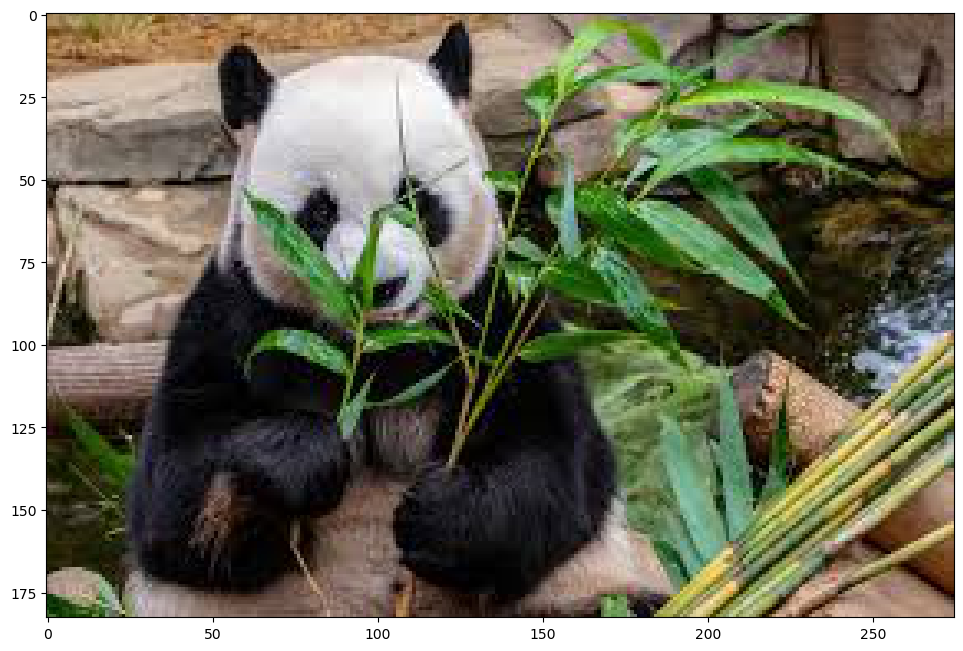

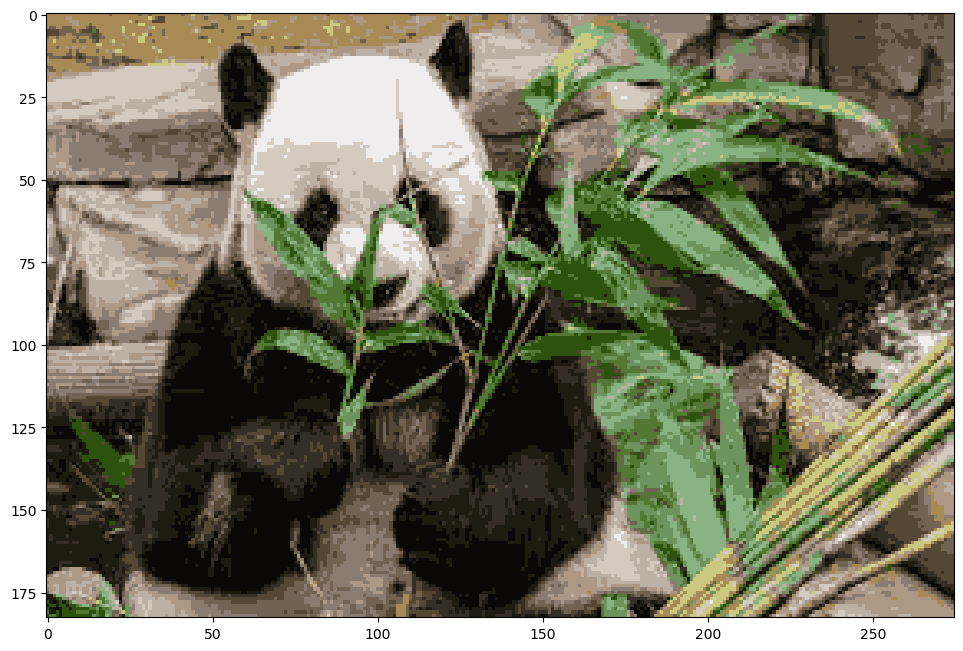

In [120]:
import matplotlib.pyplot as plt

from sklearn import cluster

image = plt.imread('makoto.jpg')

plt.figure(figsize = (15,8))

plt.imshow(image)

# 문제

# 1) 이미지 사이즈를 확인

# 2) 이미지 정규화로 실행

# 3) 16개로 군집화

# 4) 중심값 16개를 확인하시오

# 5) 중심값의 shape를 확인하시오

# 6) 출력된 label로 원래 이미지를 복원하시오

 

image.shape 

 

# 바이트 수 확인

image.shape[0] * image.shape[1] * image.shape[2]

 

# 레이블 사이즈가 되어야함

image.shape[0] * image.shape[1]



x, y, z = image.shape
image = np.array(image, dtype=np.float64) / 244
image_2d = image.reshape(x*y, z)
image_2d.shape

kmeans_cluster = cluster.KMeans(n_clusters=16)
kmeans_cluster.fit(image_2d)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_centers
 

 

cluster_centers.shape 

 

cluster_labels = kmeans_cluster.labels_

cluster_labels

 

plt.figure(figsize = (15,8))

plt.imshow(cluster_centers[cluster_labels].reshape(x,y,z)) # 압축된 이미지 출력

C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51228 missing from current

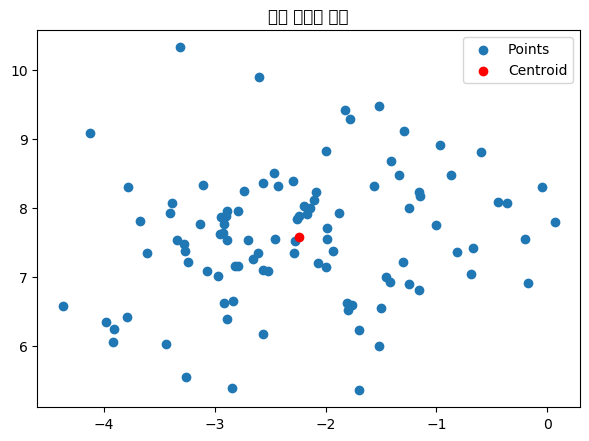

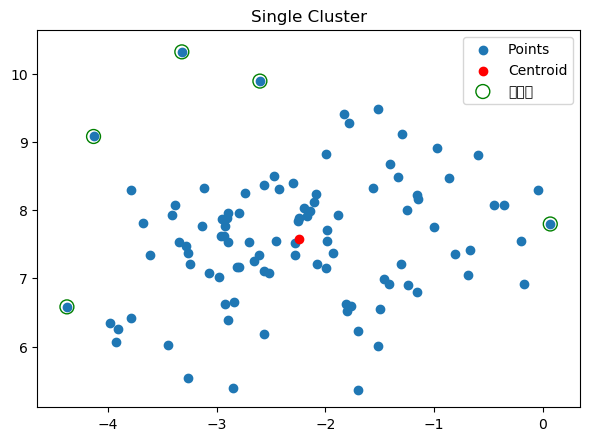

In [131]:
from sklearn.datasets import make_blobs
X, label = make_blobs(100, centers = 1)
kmeans = KMeans(n_clusters=1)
kmeans.fit(X)
f,ax = plt.subplots(figsize=(7,5))

ax.set_title('원형 이상치 제거')
ax.scatter(X[:,0],X[:,1],label='Points')
ax.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1], label='Centroid' , color='r')

ax.legend(loc='best')

distances = kmeans.transform(X) # 중심으로 부터의 거리값 
# argsort : 정렬을 실행하고 인덱스를 취함 > 정렬된 순서로 다른 데이터를 참조
# :: 1 > 1,2,3,4,5 // 2  > 2,4,6,8 인덱싱
# -1 역순으로
sorted_idx = np.argsort(distances.ravel())[::-1][:5]

f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Single Cluster')
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:, 1],
           label='Centroid', color='r')
ax.scatter(X[sorted_idx][:, 0],
           X[sorted_idx][:, 1],
           label='이상치', edgecolors='g',
           facecolors='none', s=100)
ax.legend(loc='best') 


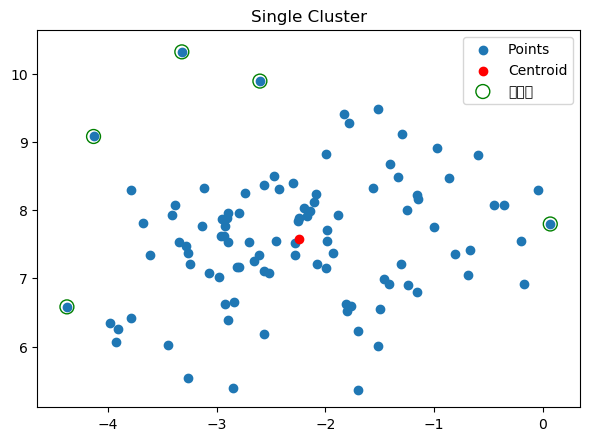

In [132]:
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Single Cluster')
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:, 1],
           label='Centroid', color='r')
ax.scatter(X[sorted_idx][:, 0],
           X[sorted_idx][:, 1],
           label='이상치', edgecolors='g',
           facecolors='none', s=100)
ax.legend(loc='best')

In [128]:
new_X = np.delete(X,sorted_idx, axis=0) # 이상치를 제거 
new_kmeans = KMeans(n_clusters=1)
new_kmeans.fit(new_X) # 중심이 조금 이동함

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0, 0.5, '특성 1')

C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47084 missing from current fon

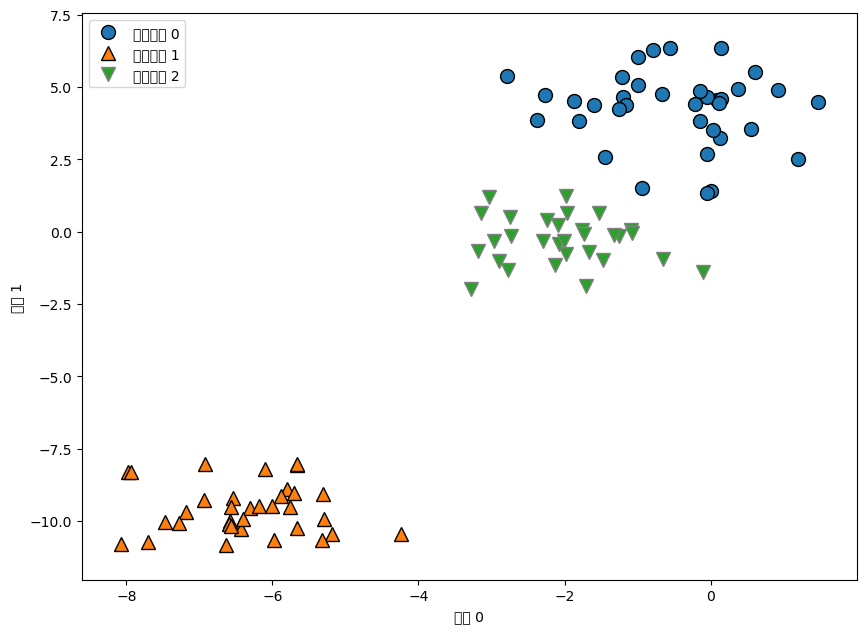

In [142]:
from sklearn.cluster import AgglomerativeClustering # 시각화 패키지가 없음 / 계층적 군집분석
import mglearn
X,y = make_blobs(random_state =11)

# 계층적 클러스터링 

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.legend(['클러스터 0', '클러스터 1', '클러스터 2'], loc ="best")
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0.5, 0, '샘플 번호')

C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49368 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54540 missing from current f

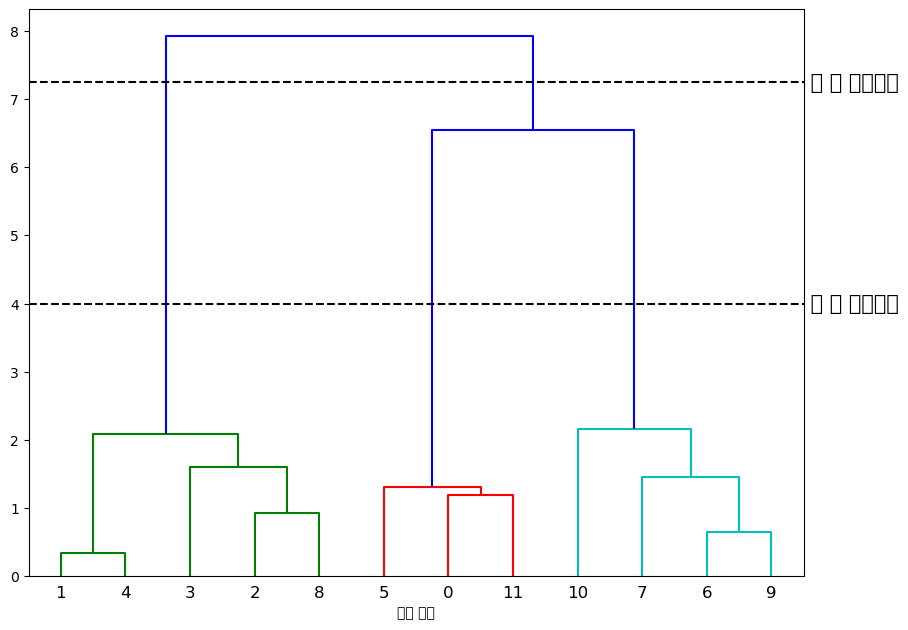

In [138]:
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
linkage_array = ward(X)
dendrogram(linkage_array)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' 두 개 클러스터', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' 세 개 클러스터', va='center', fontdict={'size': 15})
plt.xlabel("샘플 번호") 

In [ ]:
DBSCAN

Text(0, 0.5, '특성 1')

C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


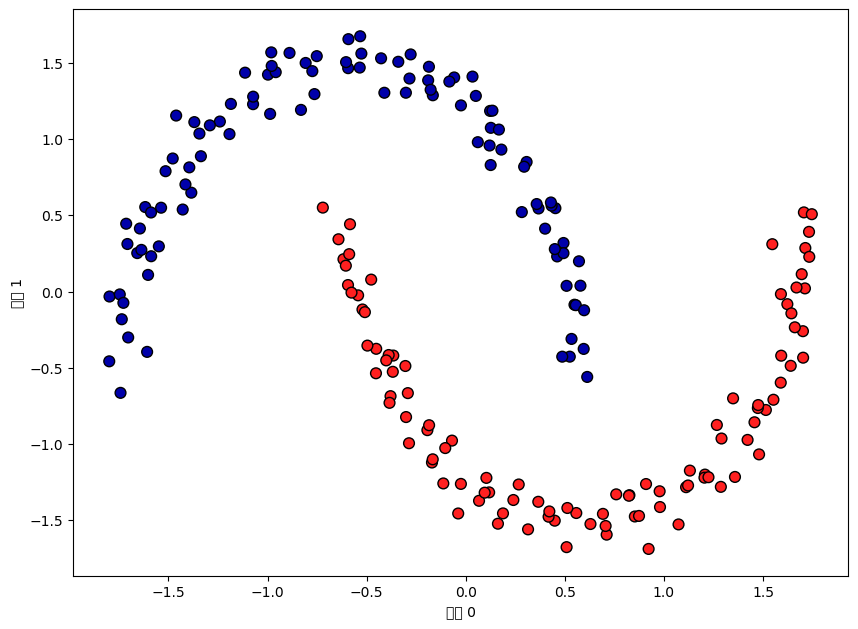

In [144]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import mglearn
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler() # 정규화
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN() # 매개변수 없을 시 디폴트 5 > 최소 군집데이터 5 min_samples / eps=0.5 같은 군집이 되기 위한 거리값 
                  # 5개가 넘지 않을시 noise 가 될수 있음 (이상치)
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
            cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1") 

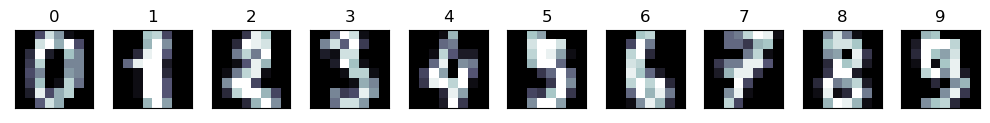

In [165]:
# 문제 : 숫자 이미지를 로딩하고 이를 scaling 해서 출력해 보시오 
from sklearn.datasets import load_digits 
from sklearn.preprocessing import scale 
import matplotlib.pyplot as plt 

# ditgits.data -> 숫자 이미지 데이터
# digits.images -> 간단한 이미지를 위한 데이터
# digits.target 숫자

data = scale(digits.data)
def print_digits(images, labels): # 이미지를 들어오는 개수대로 확인 
    f = plt.figure(figsize=(10,2))

    plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05) # adjust > 이미지간 공간 유격
    i = 0
    while (i < 10 and i < images.shape[0]): # 이미지는 장수 , 이미지 사이즈 , 컬러채널
        ax = f.add_subplot(1, 10, i + 1) # 서브 도화지를 실시간 추가
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.table # 오른쪽에 테이블 처럼 추가
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout() # 주변공간을 업게
        i += 1
print_digits(digits.images, range(10)) 

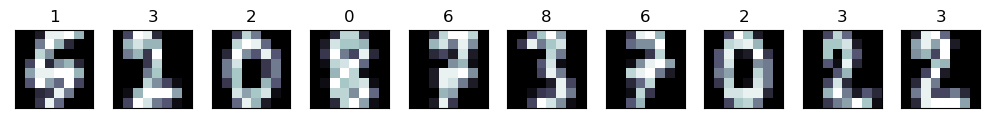

In [173]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test , images_train,images_test = train_test_split(
    data, digits.target, digits.images,  test_size=0.25, random_state =42)

from sklearn.cluster import KMeans

clf = KMeans(init='k-means++',n_clusters=10, random_state=42)
clf.fit(x_train)

# 이미지를 작게 출력하기 위해 훈련은 원래의 이미지로 하고
print_digits(images_train, clf.labels_) # 비지도 학습에서의 자긱의 예측값

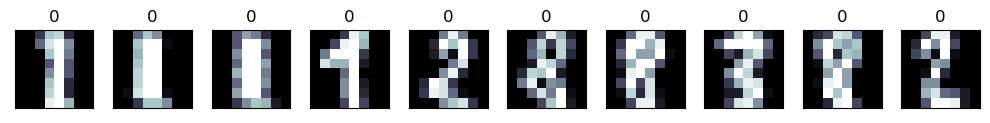

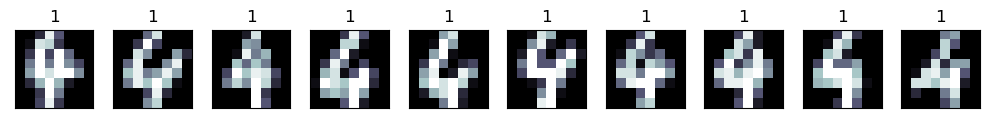

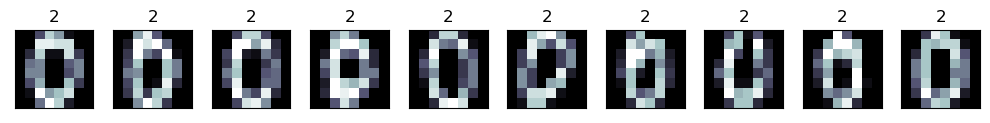

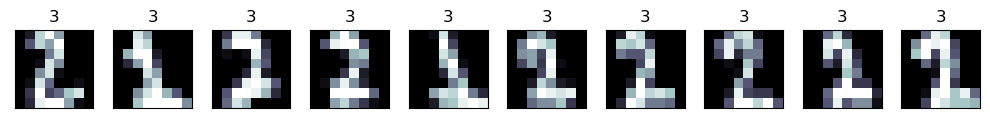

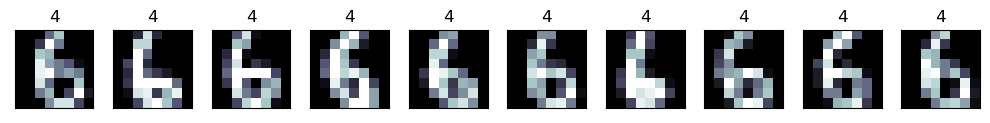

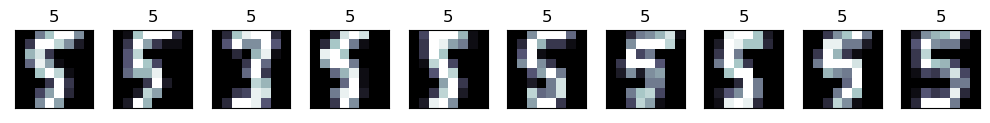

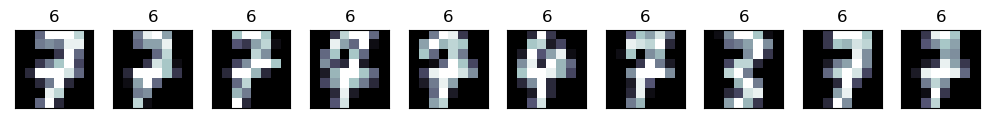

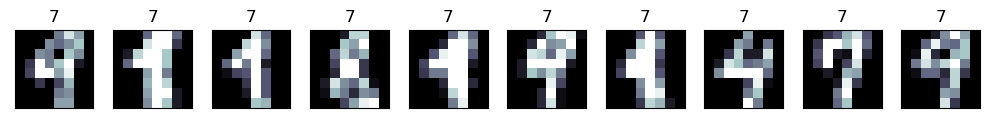

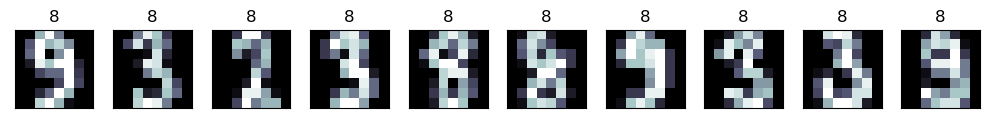

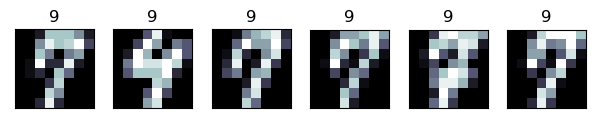

In [174]:
# 이미지만 있다 > traget x
# target : labels이 타겟이 됨
# 비지도학습 > 지도학습으로 변환
# 군집중 하나로 결정
y_pred = clf.predict(x_test) # 테스트 데이터에 대한 예측
def print_cluster(images,y_pred,cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    print_digits(images, y_pred)
    
for i in range(10):
    print_cluster(images_test,y_pred,i)